# 🔍 Credit Card Fraud Detection
## Notebook 1: Exploratory Data Analysis (EDA)

---

### Tujuan Notebook

Sebelum membangun model machine learning, tahap pertama adalah **memahami data**. Proses ini disebut Exploratory Data Analysis (EDA).

**Tujuan EDA:**
1. Memahami struktur dan karakteristik dataset
2. Mengidentifikasi missing values dan anomali
3. Melihat distribusi setiap fitur
4. Memahami seberapa parah class imbalance
5. Menemukan pola atau insight yang berguna untuk modeling

**Dataset:** Credit Card Fraud Detection dari Kaggle
- ~284,807 transaksi kartu kredit
- Data sudah di-anonymize menggunakan PCA (V1-V28)
- Hanya kolom `Time` dan `Amount` yang original

---

## 1. Import Libraries

Import semua library yang dibutuhkan untuk analisis data dan visualisasi.

In [1]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualisasi
plt.style.use('ggplot')
sns.set_palette("husl")

# Supaya grafik tampil di notebook
%matplotlib inline

# Mengabaikan warning yang tidak penting
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries berhasil di-import!")

✅ Libraries berhasil di-import!


## 2. Load Dataset

Load dataset dari folder `data/`. Dataset ini berisi transaksi kartu kredit selama 2 hari dari bank di Eropa.

In [4]:
# Load dataset
df = pd.read_csv('../data/creditcard.csv')

print(f"Dataset berhasil di-load!")
print(f"Jumlah baris: {df.shape[0]:,}")
print(f"Jumlah kolom: {df.shape[1]}")

Dataset berhasil di-load!
Jumlah baris: 284,807
Jumlah kolom: 31


## 3. Melihat Struktur Data

Langkah pertama adalah melihat beberapa baris pertama dataset untuk memahami struktur dan isi data.

In [5]:
# Menampilkan 5 baris pertama
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Penjelasan Kolom

| Kolom | Deskripsi |
|-------|-----------|
| Time | Waktu dalam detik sejak transaksi pertama |
| V1 - V28 | Fitur hasil transformasi PCA (dirahasiakan untuk privasi) |
| Amount | Jumlah uang dalam transaksi |
| Class | Target variable: 0 = Normal, 1 = Fraud |

In [6]:
# Informasi tipe data dan non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Cek missing values
missing = df.isnull().sum()
print("Missing Values per Kolom:")
print(missing[missing > 0] if missing.sum() > 0 else "Tidak ada missing values")

Missing Values per Kolom:
Tidak ada missing values


## 5. Statistik Deskriptif

Melihat ringkasan statistik untuk memahami distribusi nilai pada setiap kolom.

In [9]:
# Statistik deskriptif
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 6. Distribusi Class (Target Variable)

Bagian paling penting: melihat seberapa banyak transaksi fraud vs normal. Ini akan menunjukkan tingkat class imbalance.

In [10]:
# Hitung distribusi class
class_dist = df['Class'].value_counts()
class_pct = df['Class'].value_counts(normalize=True) * 100

print("Distribusi Class:")
print(f"Normal (0): {class_dist[0]:,} transaksi ({class_pct[0]:.3f}%)")
print(f"Fraud (1):  {class_dist[1]:,} transaksi ({class_pct[1]:.3f}%)")
print(f"\nRasio Normal:Fraud = {class_dist[0]//class_dist[1]}:1")

Distribusi Class:
Normal (0): 284,315 transaksi (99.827%)
Fraud (1):  492 transaksi (0.173%)

Rasio Normal:Fraud = 577:1


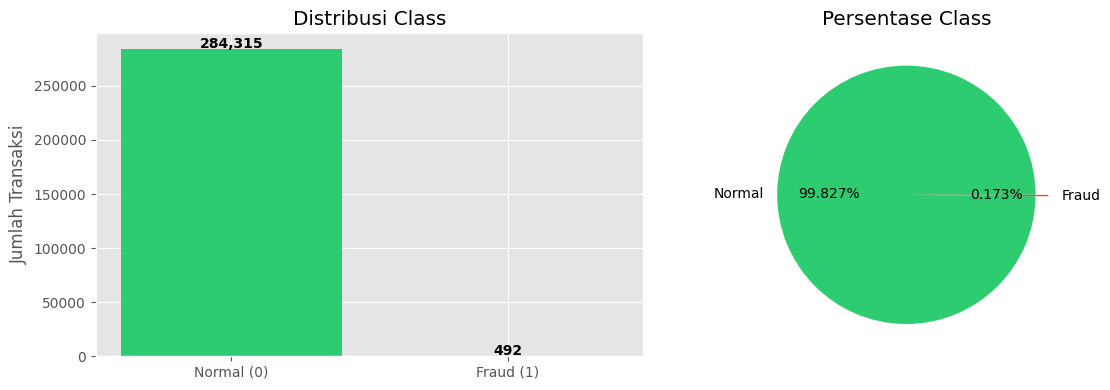

In [11]:
# Visualisasi distribusi class
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
axes[0].bar(['Normal (0)', 'Fraud (1)'], class_dist.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribusi Class')
axes[0].set_ylabel('Jumlah Transaksi')

# Menambahkan label di atas bar
for i, v in enumerate(class_dist.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(class_dist.values, labels=['Normal', 'Fraud'], autopct='%1.3f%%', 
            colors=['#2ecc71', '#e74c3c'], explode=[0, 0.1])
axes[1].set_title('Persentase Class')

plt.tight_layout()
plt.show()

## 7. Analisis Fitur Time

Kolom Time menunjukkan waktu (dalam detik) sejak transaksi pertama. Analisis ini untuk melihat apakah ada pola waktu tertentu pada transaksi fraud.

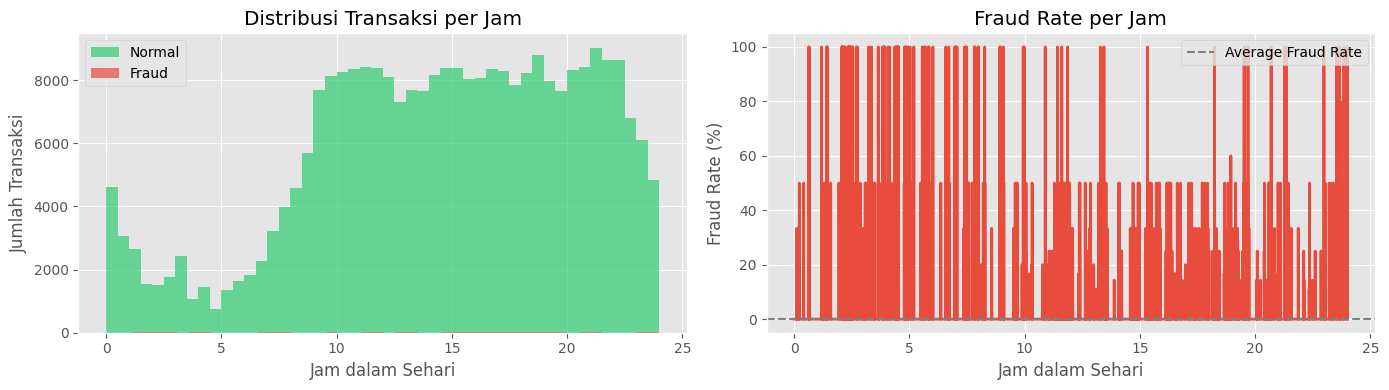

In [13]:
# Konversi Time ke jam untuk interpretasi lebih mudah
df['Hour'] = (df['Time'] / 3600) % 24

# Visualisasi distribusi Time
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Distribusi Time untuk Normal vs Fraud
axes[0].hist(df[df['Class'] == 0]['Hour'], bins=48, alpha=0.7, label='Normal', color='#2ecc71')
axes[0].hist(df[df['Class'] == 1]['Hour'], bins=48, alpha=0.7, label='Fraud', color='#e74c3c')
axes[0].set_xlabel('Jam dalam Sehari')
axes[0].set_ylabel('Jumlah Transaksi')
axes[0].set_title('Distribusi Transaksi per Jam')
axes[0].legend()

# Fraud rate per jam
fraud_by_hour = df.groupby('Hour')['Class'].mean() * 100
axes[1].plot(fraud_by_hour.index, fraud_by_hour.values, color='#e74c3c', linewidth=2)
axes[1].set_xlabel('Jam dalam Sehari')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].set_title('Fraud Rate per Jam')
axes[1].axhline(y=df['Class'].mean()*100, color='gray', linestyle='--', label='Average Fraud Rate')
axes[1].legend()

plt.tight_layout()
plt.show()

## 8. Analisis Fitur Amount

Kolom Amount adalah jumlah uang dalam transaksi. Analisis untuk melihat apakah ada perbedaan pola amount antara transaksi normal dan fraud.

In [14]:
# Statistik Amount untuk Normal vs Fraud
print("Statistik Amount:")
print("\nNormal Transactions:")
print(df[df['Class'] == 0]['Amount'].describe())
print("\nFraud Transactions:")
print(df[df['Class'] == 1]['Amount'].describe())

Statistik Amount:

Normal Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraud Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


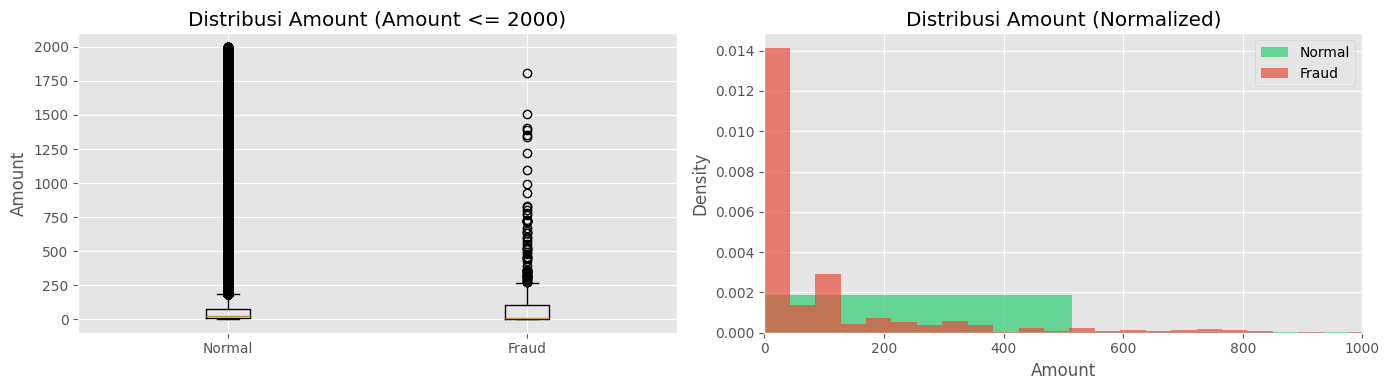

In [15]:
# Visualisasi Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Box plot (dengan limit untuk visibility)
df_viz = df[df['Amount'] <= 2000]  # Filter untuk visualisasi lebih jelas
axes[0].boxplot([df_viz[df_viz['Class'] == 0]['Amount'], 
                  df_viz[df_viz['Class'] == 1]['Amount']], 
                 labels=['Normal', 'Fraud'])
axes[0].set_ylabel('Amount')
axes[0].set_title('Distribusi Amount (Amount <= 2000)')

# Histogram
axes[1].hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, label='Normal', color='#2ecc71', density=True)
axes[1].hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribusi Amount (Normalized)')
axes[1].set_xlim(0, 1000)
axes[1].legend()

plt.tight_layout()
plt.show()

## 9. Analisis Fitur V1-V28

Fitur V1-V28 adalah hasil transformasi PCA. Meskipun tidak diketahui makna aslinya, tetap perlu dianalisis untuk melihat perbedaan distribusi antara transaksi normal dan fraud.

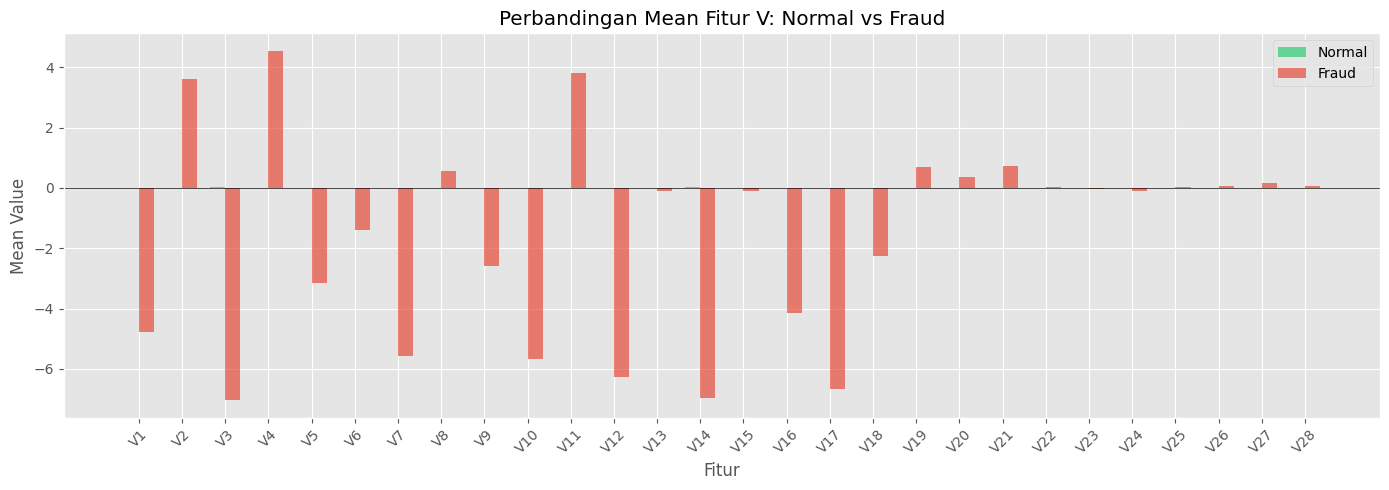

In [17]:
# Membandingkan mean fitur V untuk Normal vs Fraud
v_features = [col for col in df.columns if col.startswith('V')]

normal_mean = df[df['Class'] == 0][v_features].mean()
fraud_mean = df[df['Class'] == 1][v_features].mean()

# Visualisasi perbandingan
fig, ax = plt.subplots(figsize=(14, 5))
x = range(len(v_features))
width = 0.35

ax.bar([i - width/2 for i in x], normal_mean.values, width, label='Normal', color='#2ecc71', alpha=0.7)
ax.bar([i + width/2 for i in x], fraud_mean.values, width, label='Fraud', color='#e74c3c', alpha=0.7)

ax.set_xlabel('Fitur')
ax.set_ylabel('Mean Value')
ax.set_title('Perbandingan Mean Fitur V: Normal vs Fraud')
ax.set_xticks(x)
ax.set_xticklabels(v_features, rotation=45)
ax.legend()
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

In [18]:
# Mencari fitur dengan perbedaan terbesar antara Normal dan Fraud
diff = abs(normal_mean - fraud_mean).sort_values(ascending=False)

print("Fitur dengan Perbedaan Terbesar (Normal vs Fraud):")
print(diff.head(10))

Fitur dengan Perbedaan Terbesar (Normal vs Fraud):
V3     7.045452
V14    6.983787
V17    6.677371
V12    6.270225
V10    5.686707
V7     5.578368
V1     4.780206
V4     4.549889
V16    4.147110
V11    3.806749
dtype: float64


## 10. Analisis Korelasi

Melihat korelasi antar fitur dan korelasi setiap fitur dengan target variable (Class).

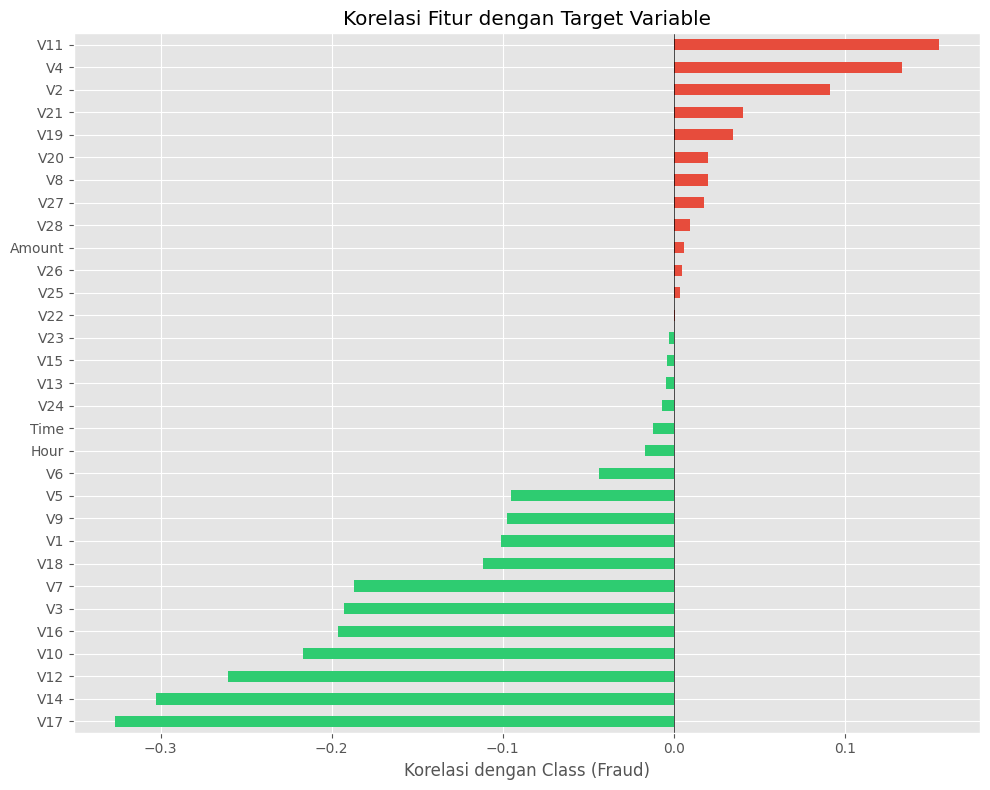

In [19]:
# Korelasi setiap fitur dengan Class
correlation_with_target = df.corr()['Class'].drop('Class').sort_values()

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 8))
correlation_with_target.plot(kind='barh', color=correlation_with_target.apply(lambda x: '#e74c3c' if x > 0 else '#2ecc71'), ax=ax)
ax.set_xlabel('Korelasi dengan Class (Fraud)')
ax.set_title('Korelasi Fitur dengan Target Variable')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

In [20]:
# Fitur dengan korelasi tertinggi (positif dan negatif)
print("Fitur dengan Korelasi Positif Tertinggi (indikator fraud):")
print(correlation_with_target.tail(5))
print("\nFitur dengan Korelasi Negatif Tertinggi (indikator normal):")
print(correlation_with_target.head(5))

Fitur dengan Korelasi Positif Tertinggi (indikator fraud):
V19    0.034783
V21    0.040413
V2     0.091289
V4     0.133447
V11    0.154876
Name: Class, dtype: float64

Fitur dengan Korelasi Negatif Tertinggi (indikator normal):
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64


## 11. Distribusi Fitur V yang Paling Berpengaruh

Visualisasi lebih detail untuk fitur-fitur yang memiliki korelasi tinggi dengan fraud.

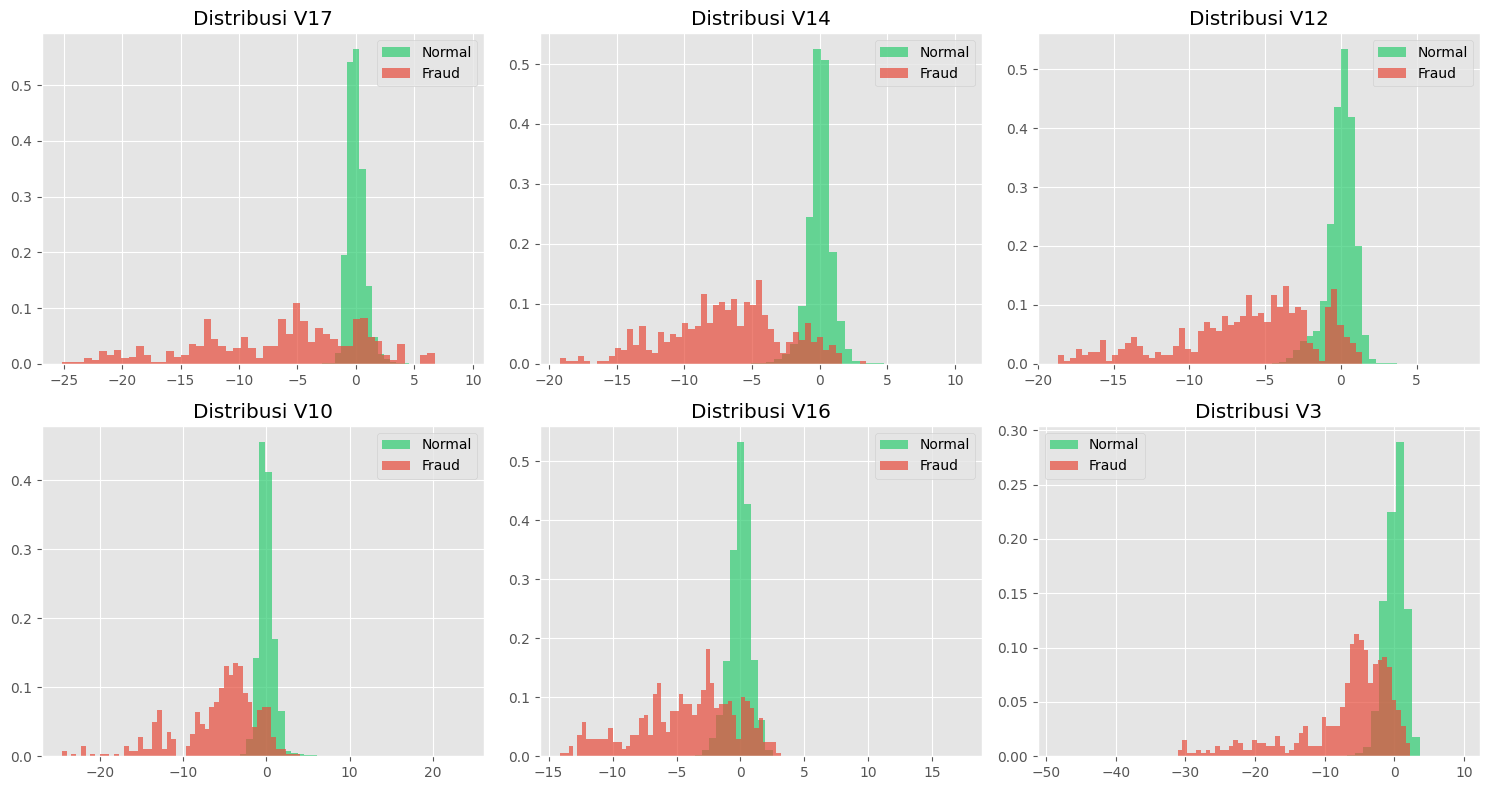

In [22]:
# Ambil 6 fitur dengan korelasi tertinggi (absolut)
top_features = abs(correlation_with_target).sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].hist(df[df['Class'] == 0][feature], bins=50, alpha=0.7, label='Normal', color='#2ecc71', density=True)
    axes[i].hist(df[df['Class'] == 1][feature], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

## 12. Kesimpulan EDA

Ringkasan temuan dari eksplorasi data.

In [24]:
# Ringkasan
print("=" * 60)
print("RINGKASAN EXPLORATORY DATA ANALYSIS")
print("=" * 60)

print(f"\n1. UKURAN DATASET")
print(f"   - Total transaksi: {len(df):,}")
print(f"   - Jumlah fitur: {len(df.columns)}")

print(f"\n2. CLASS IMBALANCE")
print(f"   - Normal: {class_dist[0]:,} ({class_pct[0]:.3f}%)")
print(f"   - Fraud: {class_dist[1]:,} ({class_pct[1]:.3f}%)")
print(f"   - Rasio: {class_dist[0]//class_dist[1]}:1")

print(f"\n3. MISSING VALUES")
print(f"   - Tidak ada missing values")

print(f"\n4. FITUR PALING BERPENGARUH")
top_pos = correlation_with_target.tail(3).index.tolist()
top_neg = correlation_with_target.head(3).index.tolist()
print(f"   - Korelasi positif: {', '.join(top_pos)}")
print(f"   - Korelasi negatif: {', '.join(top_neg)}")

print(f"\n5. INSIGHT AMOUNT")
print(f"   - Mean Amount Normal: ${df[df['Class']==0]['Amount'].mean():.2f}")
print(f"   - Mean Amount Fraud: ${df[df['Class']==1]['Amount'].mean():.2f}")

print("\n" + "=" * 60)

RINGKASAN EXPLORATORY DATA ANALYSIS

1. UKURAN DATASET
   - Total transaksi: 284,807
   - Jumlah fitur: 32

2. CLASS IMBALANCE
   - Normal: 284,315 (99.827%)
   - Fraud: 492 (0.173%)
   - Rasio: 577:1

3. MISSING VALUES
   - Tidak ada missing values

4. FITUR PALING BERPENGARUH
   - Korelasi positif: V2, V4, V11
   - Korelasi negatif: V17, V14, V12

5. INSIGHT AMOUNT
   - Mean Amount Normal: $88.29
   - Mean Amount Fraud: $122.21

